In [1]:
from tqdm.notebook import trange, tqdm
import os

import numpy as np
import pandas as pd
import swifter

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

os.chdir("..")

from src.decay_model import convert_IB_to_decay
from src.surprise_signal_simulation import load_simulation
from src.config import Ns, betas
from src.utils import BETA_STR

# Halflife Illusteation
Consider exponential moving average with parameter alpha: $y_{t} = \alpha*x_{t} + (1-\alpha)*y_{t-1}$.\
For a given window of $h$, we'd like to find an $\alpha$ such that the weight of the element at index $t-h$ would be equal to half of the weight of the $t$ element.\
For that, let's find the values of weight $t$ and weight $t-h$ as a function of $h$:

$y_{0} = x_{0}$

$y_{1} = \alpha*x_{1} + (1-alpha)x_{0}$

$y_{2} = \alpha*x_{2} + (1-\alpha)y_{1} = \alpha*x_{2} + (1-\alpha)(\alpha*x_{1} + (1-\alpha)x_{0}) = \alpha*x_{2} + \alpha(1-\alpha)x_{1} + (1-\alpha)^2*x_{0}$

$y3 = \alpha*x_{3} + (1-\alpha)y_{2} = \alpha*x_{3} + (1-\alpha)(\alpha*x_{2} + \alpha(1-\alpha)x_{1} + (1-\alpha)^2*x_{0}) = \alpha*x_{3} + \alpha(1-\alpha)x_{2} + \alpha(1-\alpha)^2x_{1} + (1-\alpha)^3*x_{0}$

.\
.\
.

$y_{t} = \alpha*x_{t} + \alpha*(1-\alpha)x_{t-1} + \alpha*(1-\alpha)^2*x_{t-2} + ... + (1-\alpha)^t*x_{0}$

We can see that the weight of $x_{0}$ is $(1-\alpha)^t$, that the weight of $x_{t-h}$ is $\alpha*(1-\alpha)^h$, and that the weight of $x_{t}$ is $\alpha$.\
Namely, in an alpha exponential decay each weight is decayed by $1-\alpha$ by each step.

Now, we can define the problem: we know the weights of $x_{t}$ and $x_{t-h}$. We'd want to find the $h$ such that $w_{h-t}$ will equal $1/2*w_{t}$:

$(1-\alpha)^h*\alpha = 1/2*\alpha$ -->\
$(1-\alpha)^h = 1/2$ -->\
$h*log(1-\alpha) = log(1/2)$ -->\
$h = log(1/2)/log(1-\alpha)$

If we'd want to find the $\alpha$ such that the weight of element $h$ would be equal to $1/2w_{t}$:

$(1-\alpha)^h = 1/2$ -->\
$h * log(1-\alpha) = log(1/2)$ -->\
$log(1-\alpha) = log(1/2)/h$ -->\
$1-\alpha = exp(log(1/2)/h)$ -->\
$\alpha = 1 - exp(log(1/2)/h)$



In [2]:
halflife_by_alpha = lambda alpha: np.log(0.5)/np.log(1-alpha)
alpha_by_halflife = lambda halflife: 1-np.exp(np.log(0.5)/halflife)

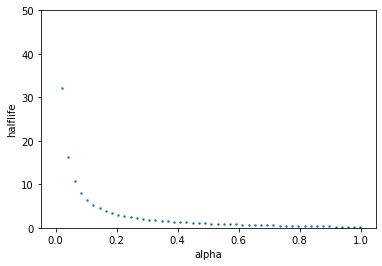

In [8]:
alphas = pd.Series(np.linspace(0.001, 0.999))
hs = pd.Series(alphas).apply(halflife_by_alpha)
plt.scatter(alphas, hs, s=2)
plt.xlabel("alpha")
plt.ylabel("halflife")
plt.ylim(0,50)
plt.show()

# Halflife vs. N of IB
We defined a linear regression with 3 variables: $$AUC = x_{t}*MA_{h}(t-1) + (1-xt)*MA_{h}(t-1) + x_{t} + \epsilon$$

Where $x_{t} \in \{0,1\}$ and $MA_{\alpha}(t)$ is the Moving Average of the history count of oddballs in the block 

TODO: Add here the loss term

In [1]:
model_surprise_dict = load_simulation()

NameError: name 'load_simulation' is not defined

In [3]:
d_results = convert_IB_to_decay(model_surprise_dict)

N:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

β:   0%|          | 0/20 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

halflife:   0%|          | 0/50 [00:00<?, ?it/s]

In [10]:
# save results as a df to disk
pd.DataFrame.from_dict(d_results, orient="index").to_csv("data/convert_ib_to_decay.csv", index=False)
df = pd.read_csv("data/convert_ib_to_decay.csv")

In [52]:
# reformat dataframe for plotting it
df["N"] = Ns
df = df.rename_axis(columns="beta_ind")
df = df.melt(id_vars="N", var_name="beta_ind", value_name="decay_params")
df["halflife"] = df["decay_params"].apply(lambda t: eval(t)[0])
df["lambda"] = df["decay_params"].apply(lambda t: eval(t)[1])
df = df.drop("decay_params", axis=1)
df[["N", "beta_ind", "halflife"]] = df[["N", "beta_ind", "halflife"]].astype(np.int32)
df["lambda"] = df["lambda"].astype(float)

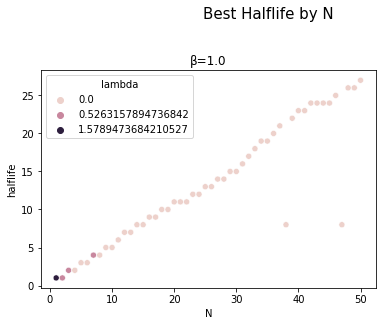

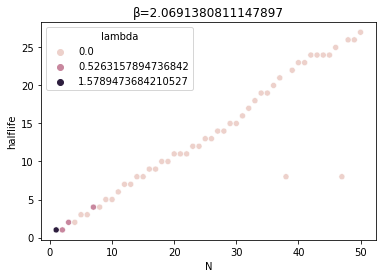

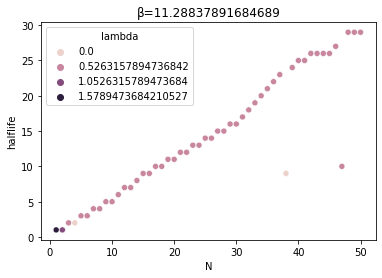

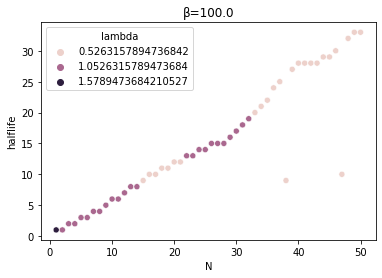

In [121]:
plt.suptitle("Best Halflife by N", x=0.5, y=1.1, 
             horizontalalignment='left', verticalalignment='top', fontsize = 15)

for i, beta_ind in enumerate([0,3,10,19]):
    sns.scatterplot(data=df.loc[df["beta_ind"] == beta_ind], x="N", y="halflife", 
                    hue="lambda")
    plt.title(f"{BETA_STR}={betas[beta_ind]}")
    plt.show()

In [73]:
# Plotly interactive display - Doesn't work on Github's renderer.
df["beta"] = df["beta_ind"].apply(lambda i: betas[i])
df.plot.scatter(backend="plotly", x="N", y="halflife", color="beta", title="Best Halflife by N")